# Word 2 Vec

The **Word2Vec** model is different from traditional methods like Bag-of-Words (BoW). Traditional methods only consider whether a word is present or how often it appears. The Word2Vec model represents each word in the corpus as a dense vector that captures semantic information.

In [7]:
#importar librerias
import nltk
import numpy as np
from nltk.tokenize import TweetTokenizer
from sklearn.manifold import TSNE

In [1]:
# 📌 This notebook assumes that corpus processing, tokenization and BoW construction was already performed on the notebook:
# 👉 'feature-extraction/bag_of_words.ipynb'

#The variables used here (such as `BoW_tr`, `tr_txt`, `V1`, `dict_indices1`) were built there.
#If you want to re-run the pipeline from scratch, check that file first.

> 🔗 **Note:** The corpus loading, tokenization and construction of the Bag of Words is at
> [`bag_of_words.ipynb`](./feature-extraction/bag_of_words.ipynb)

In [9]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

tr_txt, tr_y = get_texts_from_file('./mex20_train.txt', './mex20_train_labels.txt')
tr_tokenizados = [tokenizer.tokenize(tweet.lower()) for tweet in tr_txt]


In [10]:
from gensim.models import Word2Vec


model_w2v = Word2Vec(
    sentences=tr_tokenizados,
    vector_size=100,   # Size of the word vectors
    window=5,          # Context window size
    min_count=2,       # Words with frequency less than this will be ignored
    workers=4,         # Number of worker threads to train the model
    sg=1               # 1 = Skip-gram; 0 = CBOW
)


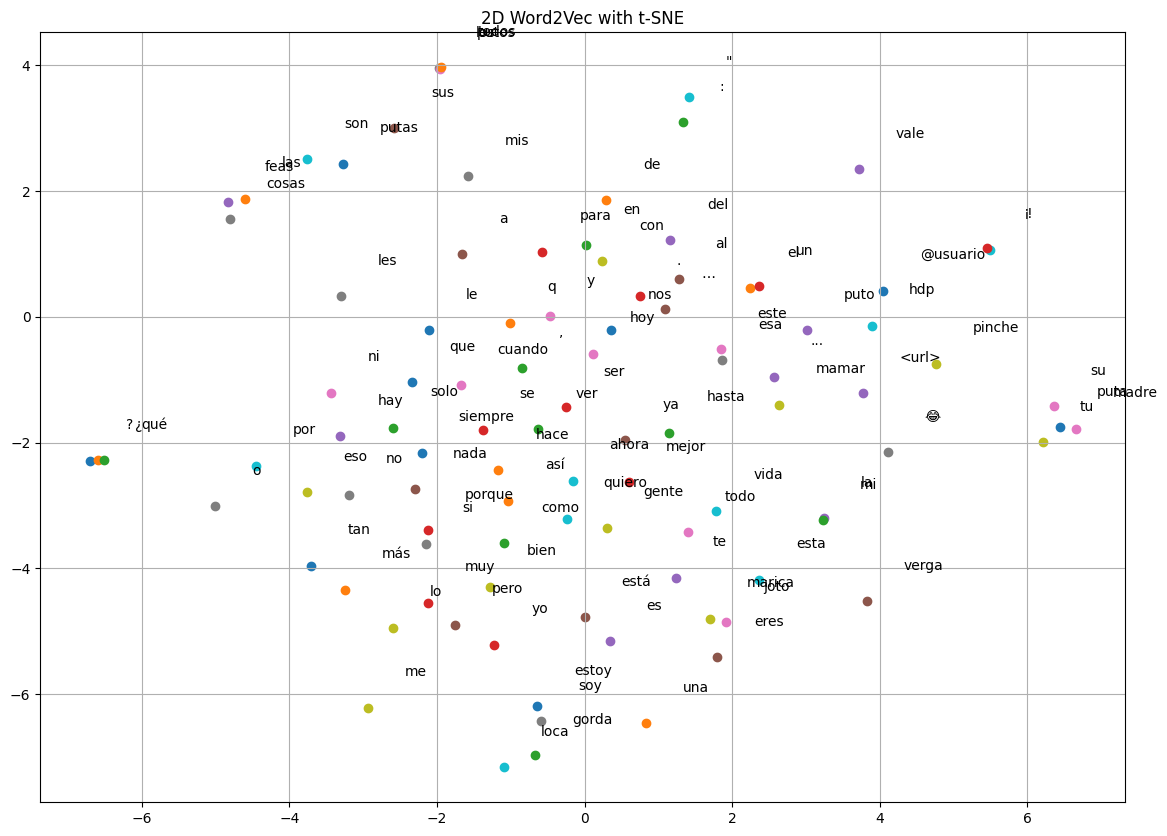

In [11]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocab = list(model_w2v.wv.key_to_index.keys())[:100]
vectors = np.array([model_w2v.wv[word] for word in vocab])


tsne = TSNE(n_components=2, random_state=42, perplexity=30)
vecs_2d = tsne.fit_transform(vectors)


plt.figure(figsize=(14, 10))
for i, word in enumerate(vocab):
    x, y = vecs_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.5, y + 0.5, word, fontsize=10)
plt.title("2D Word2Vec with t-SNE")
plt.grid(True)
plt.show()
